In [2]:
import pandas as pd

Header=none will give columns name as 0,1,2 

In [3]:
df=pd.read_csv('adult.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

providing the name for each column

In [5]:
df.columns=['Age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','captial_gain','captial_loss','hours','native_country','salary']

In [6]:
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
captial_gain      0
captial_loss      0
hours             0
native_country    0
salary            0
dtype: int64

In [7]:
df.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
captial_gain       int64
captial_loss       int64
hours              int64
native_country    object
salary            object
dtype: object

In [8]:
df['workclass']=df['workclass'].replace('?',df['workclass'].value_counts().idxmax)

In [9]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
df['occupation']=df['occupation'].str.replace('?',df['occupation'].mode()[0])

In [11]:
df['native_country']=df['native_country'].replace('?',df['native_country'].mode()[0])

In [12]:
objects=df.select_dtypes(include=object)
objects

,workclass,education,marital-status,occupation,relationship,race,sex,native_country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [13]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=objects)
df=encoder.fit_transform(df)

In [14]:
df

,Age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,captial_gain,captial_loss,hours,native_country,salary
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,11,3,1,2,0,0,38,1,1
32557,40,3,154374,2,9,2,10,2,1,1,0,0,40,1,2
32558,58,3,151910,2,9,7,1,5,1,2,0,0,40,1,1
32559,22,3,201490,2,9,1,1,4,1,1,0,0,20,1,1


Split the data dataset into input features and target column

In [15]:
y=df['salary']
x=df.drop(columns='salary')
x

,Age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,captial_gain,captial_loss,hours,native_country
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,11,3,1,2,0,0,38,1
32557,40,3,154374,2,9,2,10,2,1,1,0,0,40,1
32558,58,3,151910,2,9,7,1,5,1,2,0,0,40,1
32559,22,3,201490,2,9,1,1,4,1,1,0,0,20,1


Dividing the dataset into testing and training 

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

In [18]:
df.dtypes

Age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
captial_gain      int64
captial_loss      int64
hours             int64
native_country    int64
salary            int64
dtype: object

In [19]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [20]:
y_pred=model.predict(x_test)

In [21]:
y_pred[:5]

array([1, 2, 1, 1, 1])

In [22]:
y_test[:5]

11330    2
21884    2
22552    1
4884     1
12772    1
Name: salary, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
GaussianNB_model=accuracy_score(y_pred,y_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.94      0.87      4929
           2       0.64      0.33      0.43      1584

    accuracy                           0.79      6513
   macro avg       0.73      0.64      0.65      6513
weighted avg       0.77      0.79      0.77      6513



In [25]:
from sklearn.linear_model import LogisticRegression
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)

C:\Users\asus\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
y_pred_log=log_regression.predict(x_test)
y_pred_log[:5]

array([1, 2, 1, 1, 1])

In [27]:
y_test[:5]

11330    2
21884    2
22552    1
4884     1
12772    1
Name: salary, dtype: int64

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.metrics import accuracy_score
LogisticRegression_model=accuracy_score(y_pred_log,y_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_log,y_test))

              precision    recall  f1-score   support

           1       0.97      0.81      0.88      5904
           2       0.28      0.72      0.40       609

    accuracy                           0.80      6513
   macro avg       0.62      0.76      0.64      6513
weighted avg       0.90      0.80      0.83      6513



KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors=np.arange(1,11)
train_accurary=[]
test_accurary=[]
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_accurary.append(knn.score(x_train,y_train))
    test_accurary.append(knn.score(x_train,y_train))

In [32]:
train_accurary

[1.0,
 0.8702779484029484,
 0.8628685503685504,
 0.8372619778869779,
 0.8340371621621622,
 0.8227119164619164,
 0.8214066339066339,
 0.8145730958230958,
 0.8132678132678133,
 0.8097742628992629]

In [33]:
test_accurary

[1.0,
 0.8702779484029484,
 0.8628685503685504,
 0.8372619778869779,
 0.8340371621621622,
 0.8227119164619164,
 0.8214066339066339,
 0.8145730958230958,
 0.8132678132678133,
 0.8097742628992629]

In [34]:
import matplotlib.pyplot as plt

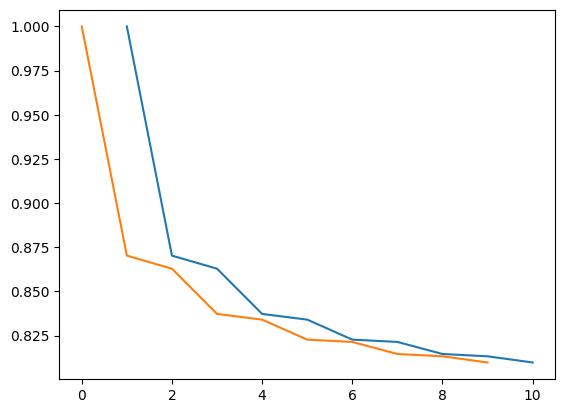

In [35]:
plt.plot(neighbors,train_accurary,test_accurary)

In [36]:
KNeigh=KNeighborsClassifier(n_neighbors=6)
KNeigh.fit(x_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",6
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [37]:
y_pred_KNN=KNeigh.predict(x_test)
y_pred_KNN[:5]

array([1, 2, 1, 1, 1])

In [38]:
y_test[:5]

11330    2
21884    2
22552    1
4884     1
12772    1
Name: salary, dtype: int64

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_KNN,y_test))

              precision    recall  f1-score   support

           1       0.96      0.80      0.88      5915
           2       0.27      0.71      0.39       598

    accuracy                           0.80      6513
   macro avg       0.62      0.76      0.63      6513
weighted avg       0.90      0.80      0.83      6513



In [40]:
from sklearn.metrics import accuracy_score
KNN_model=accuracy_score(y_pred_KNN,y_test)
KNN_model

0.7951788730231844

In [46]:
models=['Navie_bayes','KNN','LogisticRegression']
accuracy_score=[GaussianNB_model,KNN_model,LogisticRegression_model]
a=pd.DataFrame({'model':models,'accuracy':accuracy_score})

(0.75, 0.8)

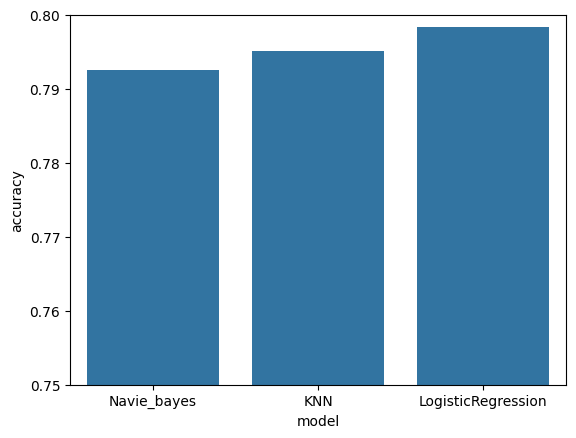

In [49]:
import seaborn as sns
sns.barplot(a,x='model',y='accuracy')
plt.ylim(0.75,0.80)

In this project, the Naive Bayes algorithm was successfully implemented to build a classification model. The dataset was first cleaned and preprocessed to handle missing values and prepare it for analysis. Relevant features were selected to improve the model’s performance and reliability.

The Naive Bayes classifier demonstrated good accuracy and efficiency, especially due to its simplicity and ability to work well with limited training data. The results show that the model is effective for probabilistic classification tasks and performs well when the assumption of feature independence is reasonably satisfied.

Overall, this project highlights that Naive Bayes is a fast, lightweight, and reliable machine learning algorithm for classification problems. It is especially suitable for real-world applications such as text classification, spam detection, and sentiment analysis. With further feature engineering and comparison with other algorithms, the model’s performance can be enhanced even more.